# Data Component Use Case for Wave Data Interpolation 

## Introduction

Version 1: Surface wave properties are important for quantifying dynamical processes such as wave power and bottom shear stress on the seafloor. This Jupyter notebook demonstrates how to use the CSDMS data component named bmi-ww3 to download surface wave properties from WaveWatch3 reanalysis model output, slice the data to a desired time period, interpolate it to a specific lat/lon coordinate, and calculate the wave power over time at that point. 


This Jupyter notebook demonstrates how to use the CSDMS data component to download the Wavewatch3 dataset and use these data to look at surface wave properties in a specific location in the Gulf of Mexico and calculate the wave power at this location. 

Significant wave height refers to the average wave height, from crest to trough, of the highest one-third of the waves (source(s):https://media.bom.gov.au/social/blog/870/ruling-the-waves-how-a-simple-wave-height-concept-can-help-you-judge-the-size-of-the-sea/#:~:text=Significant%20wave%20height%20is%20defined,a%20fixed%20point%20at%20sea ; https://www.vos.noaa.gov/MWL/apr_06/waves.shtml ). Peak wave period is the wave period associated with the most energetic waves in the total wave spectrum at a specific points (source: https://www.nhc.noaa.gov/pdf/TAFB_wave_period.pdf). Peak wave direction is the wave direciton at the frequency where the wave energy spectrum reaches its maximum (source: https://cdip.ucsd.edu/m/documents/glossary.html#:~:text=and%20marine%20geology.-,Peak%20direction,WAVE%20SPECTRUM%20reaches%20its%20maximum). 


This notebook includes the following sections:
- Step 0: Initial Setup  

    This section will walk through installing several Python packages.    
  
  
- Step 1: Download Data  
    
    This section will use the data component to download the data.  
    
    
- Step 2: Interpolate the Data  

    This section will interpolate the data onto a user-specified latitude and longitude.
    
    
- Step 3: Visualize Results  

    This section will visualize the final results as plots of the surface wave parameters over the specified time period at the desired location.
    
If you have any suggestions to improve this notebook, please create a Github issue here.

**Run Notebook:**

**Suggested Citation:**

## Initial Setup

We will need to install several python packages and (create folders for this notebook*).

The following packages need to be installed to run this notebook:
- 
- 
- 
- 
- 

### Install Packages (on Local PC)

If you want to run this notebook on your PC, you can run the following command which will create a separate conda environment names "wavewatch3_wavepower" and install all the required packages for you. After the installation, please make sure to activate the environment to run this notebook.

In [1]:
# ! conda env create --file=environment.yml

## Install API key files 
(not sure if this is needed)

In [2]:
#from utils import install_api_key
#install_api_key()

## Create folders
(not sure if this is needed)
We will first import all the python packages and then create ___ folders for this notebook:
- configuration file folder: this folder includes a configuration file which will be used by the data component. In this example, we have prepared a configuration file ('insert_name.yaml') and put it in this folder.
- cache folder: this folder stores the downloaded data file.
- results folder: this folder stores the final results.

In [3]:
# Import packages 
from bmi_wavewatch3 import WaveWatch3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from windrose import WindroseAxes

## Step 1: Download Dataset

### Background

Surface wave properties are important for determining the amount of wave energy available to drive different processes. For example, surface wave properties can be used to calcualte wave power which can be used to determine how much energy is hitting a coast, impacting things like coastal erosion and sediment transport.

We will use the Wavewatch3 data component to download WaveWatch3 data for a specific latitude-longitude on the shelf in the Gulf of Mexico for 2005-03-17 through 2005-06-22. These data include:
- Significant wave height (meters)  
- Peak wave period (seconds)  
- Peak wave direction (degrees) 
    - Convention: https://polar.ncep.noaa.gov/waves/wavewatch/manual.v5.16.pdf
        - According to page 93 of this manual, the wave direction is given in meteorological convention, with 0&deg; meaning waves coming from the north and 90&deg; meaning waves coming from the east.
        - It is recommended to check this by looking at the wave rose diagram and location of the point of interest to make sure this all makes sense.
- Windspeed in east-west direction (meters/second)
    - **Positive values are wind coming from the east, negative values are wind coming from the west**)  
- Windspeed in the north-south direction (meters/second)
    - **Positive values are wind coming from the north, negative values are wind coming from the south**)
    
(Is this all true?) The '_.yaml' file includes the parameter settings of this data component. The following cells demonstrate how to use the configuration file to intitialize a data component and how to use the variable and grid related mathods of this data component to get the metadata as well as the data values.

(insert image of the Gulf of Mexico)


Since the ww3 bmi pulls in one month of data at a time, we will specify the first month in the desired data, how many months past that month we want, and then specify a specific start and end date. We will also specify the WW3 grid that we want to pull data from (insert link to different grids), as well as the latitude and longitude coordinates of the specific point we want to look at.

In [4]:
# New pymt stuff 
# Initialize Wavewatch3 data component
#wave = Wavewatch3()
#wave.initialize(os.path.join(config_dir, '*_config.yaml'))

In [5]:
# New pymt stuff
# Get Wavewatch3 variable information
# Variable 1 = peak wave period
#var_name = wave.output_var_names[0]
#var_unit = wave.var_units(var_name)
#var_location = wave.var_location(var_name)
#var_type = wave.var_type(var_name)
#var_grid = wave.var_grid(var_name)
#var_itemsize = wave.var_itemsize(var_name)
#var_nbytes = wave.var_nbytes(var_name)
#print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {} \nvar_itemsize: {}' 
            #'\nvar_nbytes: {} \n'. format(var_name, var_unit, var_location, var_type, var_grid, var_itemsize, var_nbytes))

In [6]:
# New pymt stuff
# Get Wavewatch3 grid information (not sure if this applies to ww3)
#wave_grid_ndim = wave.grid_ndim(var_grid) 
#wave_grid_type = wave.grid_type(var_grid)
#wave_grid_shape = wave.grid_shape(var_grid)
#wave_grid_spacing = wave.grid_spacing(var_grid)
#wave_grid_origin = wave.grid_origin(var_grid)

#print('grid_ndim: {} \ngrid_type: {} \ngrid_shape: {} \ngrid_spacing: {} \ngrid_origin: {}'.format(
    #wave_grid_ndim, wave_grid_type, wave_grid_shape, wave_grid_spacing, wave_grid_origin))

In [7]:
# New pymt stuff
# Get Wavewatch3 variable data (not sure if this applies to ww3)
#wave_data = wave.get_value(var_name)
#wave_data_2D = wave_data.reshape(wave_grid_shape)

# plot wave data (replace with plot below)
# fig, ax = plt.subplots(1,1,figsize=(10,5))
# im = ax.imshow(wave_data_2D)
# ax.title.set_text('Wave Data')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# fig.colorbar(im,label='elevation(m)')

In [8]:
# Specify the time period and the coordinates of interest

# Starting month
start_month = "2005-03-01"

# Number of months after to pull
num_months = 3 # should go to '2005-07-01'

# Start date (specific date to start data)
start_date = "2005-03-17"

# End date (specific date to end data)
end_date = "2005-06-22"

# Specify the grid
grid = 'at_4m' # 'at_4m' = Atlantic grid at 4 arcminute resolution 

# Specify the lat lon we want (the one point)
lat = 28.8 # degrees 
lon = 267.4 # degrees

In [9]:
# Fetch the data for the time period we want (to start at) and the grid we want 
ww3 = WaveWatch3(start_month, grid=grid)

# Save the data to a list 
months = [ww3.data]

# Print info about the data
ww3.data

<xarray.Dataset>
Dimensions:     (step: 249, latitude: 481, longitude: 586)
Coordinates:
    time        datetime64[ns] 2005-03-01
  * step        (step) timedelta64[ns] 0 days 00:00:00 ... 31 days 00:00:00
    surface     float64 1.0
  * latitude    (latitude) float64 47.0 46.93 46.87 46.8 ... 15.13 15.07 15.0
  * longitude   (longitude) float64 261.0 261.1 261.1 ... 299.9 299.9 300.0
    valid_time  (step) datetime64[ns] dask.array<chunksize=(249,), meta=np.ndarray>
Data variables:
    dirpw       (step, latitude, longitude) float32 dask.array<chunksize=(249, 481, 586), meta=np.ndarray>
    perpw       (step, latitude, longitude) float32 dask.array<chunksize=(249, 481, 586), meta=np.ndarray>
    swh         (step, latitude, longitude) float32 dask.array<chunksize=(249, 481, 586), meta=np.ndarray>
    u           (step, latitude, longitude) float32 dask.array<chunksize=(249, 481, 586), meta=np.ndarray>
    v           (step, latitude, longitude) float32 dask.array<chunksize=(249, 481, 586), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2022-09-22T13:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
# Add on the additional months
for _ in range(num_months):
    ww3.inc()
    months.append(ww3.data)

In [11]:
# Concatenate all of the data together
ww3_all = xr.concat(months, dim='step')

# Create the time steps for this data
times = ww3_all.time + ww3_all.step

# Print these times
times.data[0], times.data[-1]

(numpy.datetime64('2005-03-01T00:00:00.000000000'),
 numpy.datetime64('2005-07-01T00:00:00.000000000'))

In [12]:
# Pull out the steps for the time period we want 
steps = (times >= np.datetime64(start_date)) & (times <= np.datetime64(end_date))

In [13]:
# Slice the steps to this time period 
sliced_data = ww3_all.isel(step=steps)

# Create the corresponding time steps 
sliced_times = sliced_data.time + sliced_data.step

# Print these time steps
sliced_times.data[0], sliced_times.data[-1]

(numpy.datetime64('2005-03-17T00:00:00.000000000'),
 numpy.datetime64('2005-06-22T00:00:00.000000000'))

In [14]:
sliced_data

<xarray.Dataset>
Dimensions:     (step: 780, latitude: 481, longitude: 586)
Coordinates:
    time        (step) datetime64[ns] 2005-03-01 2005-03-01 ... 2005-06-01
  * step        (step) timedelta64[ns] 16 days 00:00:00 ... 21 days 00:00:00
    surface     float64 1.0
  * latitude    (latitude) float64 47.0 46.93 46.87 46.8 ... 15.13 15.07 15.0
  * longitude   (longitude) float64 261.0 261.1 261.1 ... 299.9 299.9 300.0
    valid_time  (step) datetime64[ns] dask.array<chunksize=(121,), meta=np.ndarray>
Data variables:
    dirpw       (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
    perpw       (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
    swh         (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
    u           (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
    v           (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2022-09-22T13:54 GRIB to CDM+CF via cfgrib-0.9.1...

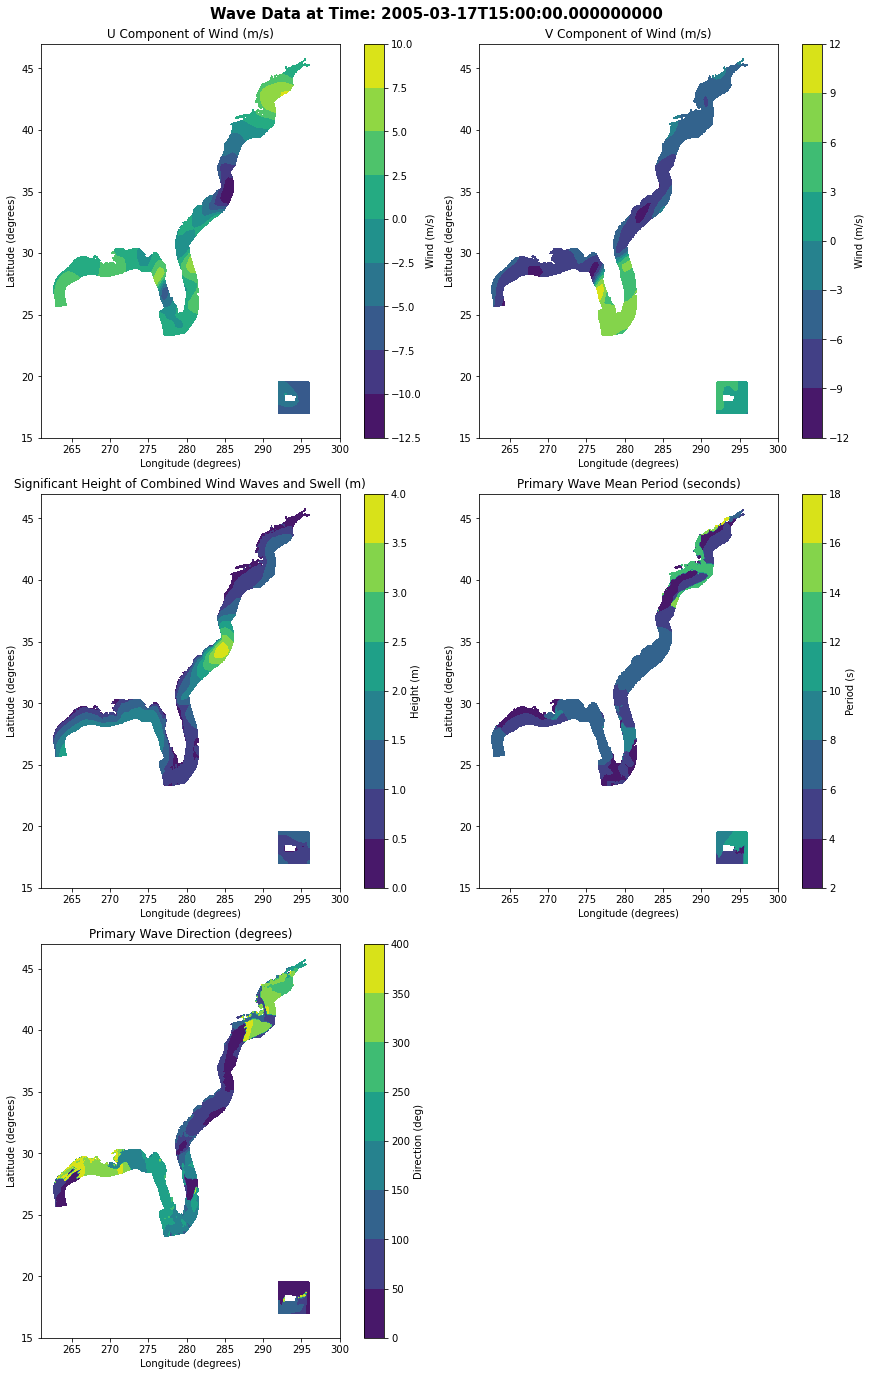

In [15]:
# Plot the data for one time step
fig1, ax1 = plt.subplots(3,2, figsize=(12,19), constrained_layout=True)
time_stp1 = 5 # index of time step we want to plot

fig1.suptitle('Wave Data at Time: ' + str(sliced_data.valid_time[time_stp1].values), fontweight='bold', fontsize=15)


# U wind
cs1 = ax1[0,0].contourf(sliced_data.longitude[:].values, sliced_data.latitude[:].values, sliced_data.u[time_stp1,:,:])
ax1[0,0].set_title('U Component of Wind (m/s)')
fig1.colorbar(cs1, ax=ax1[0,0], label='Wind (m/s)')
ax1[0,0].set_xlabel('Longitude (degrees)')
ax1[0,0].set_ylabel('Latitude (degrees)')

# V wind
cs2 = ax1[0,1].contourf(sliced_data.longitude[:].values, sliced_data.latitude[:].values, sliced_data.v[time_stp1,:,:])
ax1[0,1].set_title('V Component of Wind (m/s)')
fig1.colorbar(cs2, ax=ax1[0,1], label='Wind (m/s)')
ax1[0,1].set_xlabel('Longitude (degrees)')
ax1[0,1].set_ylabel('Latitude (degrees)')

# Significant wave height of combined wind waves and swell
cs3 = ax1[1,0].contourf(sliced_data.longitude[:].values, sliced_data.latitude[:].values, sliced_data.swh[time_stp1,:,:])
ax1[1,0].set_title('Significant Height of Combined Wind Waves and Swell (m)')
fig1.colorbar(cs3, ax=ax1[1,0], label='Height (m)')
ax1[1,0].set_xlabel('Longitude (degrees)')
ax1[1,0].set_ylabel('Latitude (degrees)')

# Primary wave mean period
cs4 = ax1[1,1].contourf(sliced_data.longitude[:].values, sliced_data.latitude[:].values, sliced_data.perpw[time_stp1,:,:])
ax1[1,1].set_title('Primary Wave Mean Period (seconds)')
fig1.colorbar(cs4, ax=ax1[1,1], label='Period (s)')
ax1[1,1].set_xlabel('Longitude (degrees)')
ax1[1,1].set_ylabel('Latitude (degrees)')

# Primary wave direction 
cs5 = ax1[2,0].contourf(sliced_data.longitude[:].values, sliced_data.latitude[:].values, sliced_data.dirpw[time_stp1,:,:]) 
ax1[2,0].set_title('Primary Wave Direction (degrees)')
fig1.colorbar(cs5, ax=ax1[2,0], label='Direction (deg)')
ax1[2,0].set_xlabel('Longitude (degrees)')
ax1[2,0].set_ylabel('Latitude (degrees)')

# Delete the extra set of axes
fig1.delaxes(ax1[2,1])

The plot above shows a snapshot in time of the different wave variables in the dataset. The time step shown is the 15th hour of 2005-03-17. The data for the whole grid is shown.

## Step 2: Interpolate the Data  **Pick up here**

Now that we have the WW3 data for the whole grid, let's keep only the data for the grid point that we want by interpolating onto the lat/lon specified above.

In [16]:
# Copy the original data to work with
wave_data = sliced_data.copy()

# Print to make sure the copy worked
print(wave_data)

<xarray.Dataset>
Dimensions:     (step: 780, latitude: 481, longitude: 586)
Coordinates:
    time        (step) datetime64[ns] 2005-03-01 2005-03-01 ... 2005-06-01
  * step        (step) timedelta64[ns] 16 days 00:00:00 ... 21 days 00:00:00
    surface     float64 1.0
  * latitude    (latitude) float64 47.0 46.93 46.87 46.8 ... 15.13 15.07 15.0
  * longitude   (longitude) float64 261.0 261.1 261.1 ... 299.9 299.9 300.0
    valid_time  (step) datetime64[ns] dask.array<chunksize=(121,), meta=np.ndarray>
Data variables:
    dirpw       (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
    perpw       (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
    swh         (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
    u           (step, latitude, longitude) float32 dask.array<chunksize=(121, 481, 586), meta=np.ndarray>
    v           (step, latitude, longitude) float

In [17]:
# Use the built in xarray interpolation 
# to interpolate onto the given lat/lon
wave_data2 = wave_data.interp(latitude=lat, longitude=lon)

/Users/brun1463/opt/anaconda3/envs/landlab/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/Users/brun1463/opt/anaconda3/envs/landlab/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  retur

In [18]:
# # Plot this interpolation as time series 
# fig2, ax2 = plt.subplots(4,1, figsize=(15,22), constrained_layout=True)
# fig2.suptitle('Interpolated Wave Data Time Series at Lat: ' + str(lat) + u'\N{DEGREE SIGN}' + ' Lon: ' + str(lon) + u'\N{DEGREE SIGN}',
#               fontweight='bold', fontsize=15)

# # U and v wind
# #ax2[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# #ax2[0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
# #a2[0].xaxis.get_major_ticks()
# ax2[0].plot(wave_data2.valid_time.values, wave_data2.u.values, linewidth=3, color='r', label='u wind')
# ax2[0].plot(wave_data2.valid_time.values, wave_data2.v.values, linewidth=3, color='b', label='v wind')
# ax2[0].set_title('Wind (m/s)')
# ax2[0].set_xlabel('Time (3-hours)')
# ax2[0].set_ylabel('Wind (m/s)')
# ax2[0].legend()
# #yticks1 = ax2[0].xaxis.get_major_ticks()

# # Significant wave height of combined wind waves and swell
# #ax2[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# #ax2[1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
# ax2[1].plot(wave_data2.valid_time.values, wave_data2.swh.values, linewidth=3, color='g')
# ax2[1].set_title('Significant Height of Combined Wind Waves and Swell (m)')
# ax2[1].set_xlabel('Time (3-hours)')
# ax2[1].set_ylabel('Wave Height (m)')

# # Primary wave mean period
# #ax2[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# #ax2[2].xaxis.set_major_locator(mdates.DayLocator(interval=5))
# ax2[2].plot(wave_data2.valid_time.values, wave_data2.perpw.values, linewidth=3, color='orange')
# ax2[2].set_title('Primary Wave Mean Period (seconds)')
# ax2[2].set_xlabel('Time (3-hours)')
# ax2[2].set_ylabel('Wave Period (s)')

# # Primary wave direction 
# #ax2[3].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# #ax2[3].xaxis.set_major_locator(mdates.DayLocator(interval=5))
# ax2[3].plot(wave_data2.valid_time.values, wave_data2.dirpw.values, linewidth=3, color='magenta')
# ax2[3].set_title('Primary Wave Direction (degrees)')
# ax2[3].set_xlabel('Time (3-hours)')
# ax2[3].set_ylabel('Wave Direction (deg)')

Now we need to interpolate out the NaNs in the time series.

In [19]:
# Manually create a posiitonal index for the data 
ind = np.arange(0, len(wave_data2.step.values),1)
print(len(ind))

780


In [20]:
# Make a new xarray dataset to fill with the data
wave_data4 = xr.Dataset(
            data_vars=dict(
                perpw=(['idx'], wave_data2.perpw.values),
                dirpw=(['idx'], wave_data2.dirpw.values),
                swh=(['idx'], wave_data2.swh.values),
                u=(['idx'], wave_data2.u.values),
                v=(['idx'], wave_data2.v.values),
            ),
            coords=dict(idx=(['idx'], ind),
                       time=(['idx'], sliced_times.values)),
            attrs=dict(description='Wave data. perpw = peak wave period (seconds), \
                       dirpw = peak wave direction (degrees), swh = significant wave height (m), \
                       u = u wind (m/s), v = v wind (m/s)'),
            )

In [21]:
# Interpolate the NaNs out of this new dataset
wave_data5 = wave_data4.interpolate_na(dim='idx', method='linear', fill_value='extrapolate')

In [22]:
# Check to make sure the interpolation worked
print(np.where(np.isnan(wave_data5.perpw.values)))

(array([], dtype=int64),)


Text(0, 0.5, 'Wave Direction (deg)')

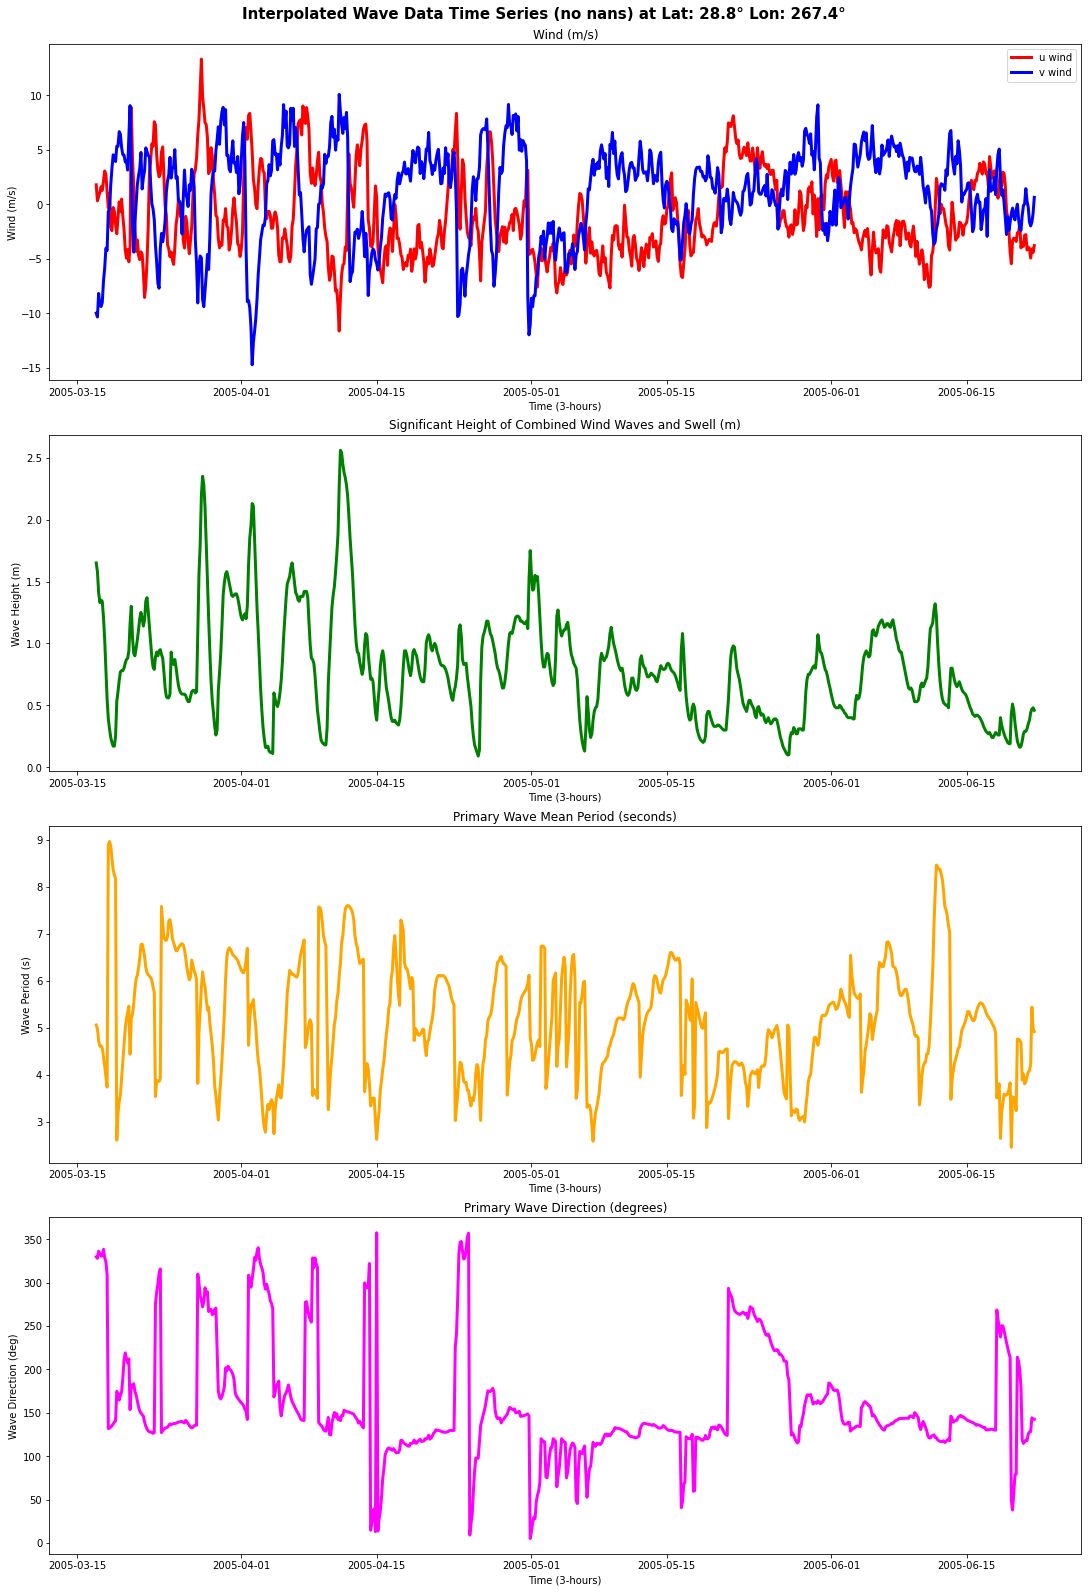

In [23]:
# Plot the data  
fig3, ax3 = plt.subplots(4,1, figsize=(15,22), constrained_layout=True)
fig3.suptitle('Interpolated Wave Data Time Series (no nans) at Lat: ' + str(lat) + u'\N{DEGREE SIGN}' + ' Lon: ' + str(lon) + u'\N{DEGREE SIGN}',
              fontweight='bold', fontsize=15)

# U and v wind
#ax3[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#ax3[0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
#a3[0].xaxis.get_major_ticks()
ax3[0].plot(wave_data5.time.values, wave_data5.u.values, linewidth=3, color='r', label='u wind')
ax3[0].plot(wave_data5.time.values, wave_data5.v.values, linewidth=3, color='b', label='v wind')
ax3[0].set_title('Wind (m/s)')
ax3[0].set_xlabel('Time (3-hours)')
ax3[0].set_ylabel('Wind (m/s)')
ax3[0].legend()
#yticks1 = ax3[0].xaxis.get_major_ticks()

# Significant wave height of combined wind waves and swell
#ax3[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#ax3[1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax3[1].plot(wave_data5.time.values, wave_data5.swh.values, linewidth=3, color='g')
ax3[1].set_title('Significant Height of Combined Wind Waves and Swell (m)')
ax3[1].set_xlabel('Time (3-hours)')
ax3[1].set_ylabel('Wave Height (m)')

# Primary wave mean period
#ax3[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#ax3[2].xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax3[2].plot(wave_data5.time.values, wave_data5.perpw.values, linewidth=3, color='orange')
ax3[2].set_title('Primary Wave Mean Period (seconds)')
ax3[2].set_xlabel('Time (3-hours)')
ax3[2].set_ylabel('Wave Period (s)')

# Primary wave direction 
#ax3[3].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#ax3[3].xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax3[3].plot(wave_data5.time.values, wave_data5.dirpw.values, linewidth=3, color='magenta')
ax3[3].set_title('Primary Wave Direction (degrees)')
ax3[3].set_xlabel('Time (3-hours)')
ax3[3].set_ylabel('Wave Direction (deg)')

## Step 2.5: Calculate Wave Power

Wave power is useful because it is an indication of the ability of wave to resuspend sediment on the seafloor...

Now that we have a time series of wave data for our desired point in the Gulf of Mexico, let's use this data to calculate a time series of the wave power at this location.

In [24]:
# power = amplitude^2/freq^2?
amp = wave_data5.swh.values/2 # meters
freq = (2*np.pi)/wave_data5.perpw.values # seconds

wave_power = (amp**2)*(wave_data5.perpw.values) #m^2*s
wave_power2 = (amp**2)/(freq**2) # units? m^2*s^2?

Text(0, 0.5, 'Wave Power (m^2/s)')

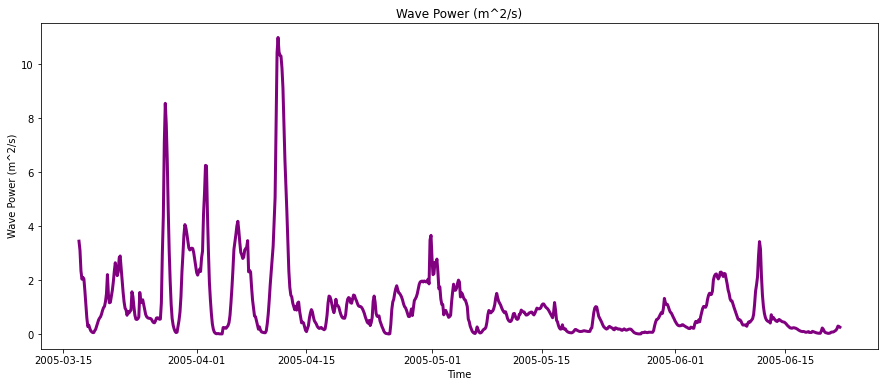

In [25]:
# Plot a time series of the wave power
fig4, ax4 = plt.subplots(figsize=(15,6))
ax4.plot(wave_data5.time.values, wave_power, color='purple', linewidth=3)
ax4.set_title('Wave Power (m^2/s)')
ax4.set_xlabel('Time')
ax4.set_ylabel('Wave Power (m^2/s)')

## Step 3: Visualize Results

Now that the data has been interpolated onto the desired location and plotted as a time series, let's look at the data more closely.

Text(0.5, 1.0, 'Wind Rose Diagram for Winds at Lat: 28.8° Lon: 267.4°')

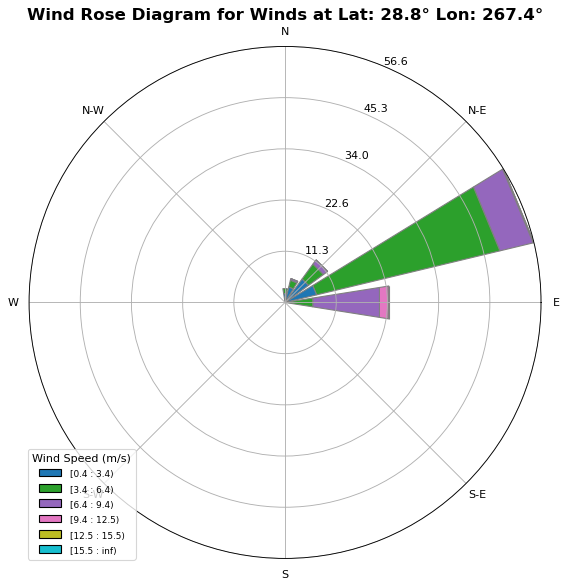

In [26]:
# Make windrose plot for wind
# U and v wind
ax4 = WindroseAxes.from_ax()
windvelo = np.sqrt(((wave_data5.u.values)**2)+((wave_data5.v.values)**2))
winddir = np.rad2deg(np.arctan(wave_data5.v.values, wave_data5.u.values))
ax4.bar(winddir, windvelo, normed=True, opening=0.8, edgecolor='gray', cmap=cm.tab10)
ax4.set_legend(title='Wind Speed (m/s)', loc='lower left')
ax4.set_title('Wind Rose Diagram for Winds at Lat: ' + str(lat) + u'\N{DEGREE SIGN}' + ' Lon: ' + str(lon) + u'\N{DEGREE SIGN}',
             fontweight='bold', fontsize=15)

Text(0.5, 1.0, 'Wind Rose Diagram for Waves at Lat: 28.8° Lon: 267.4°')

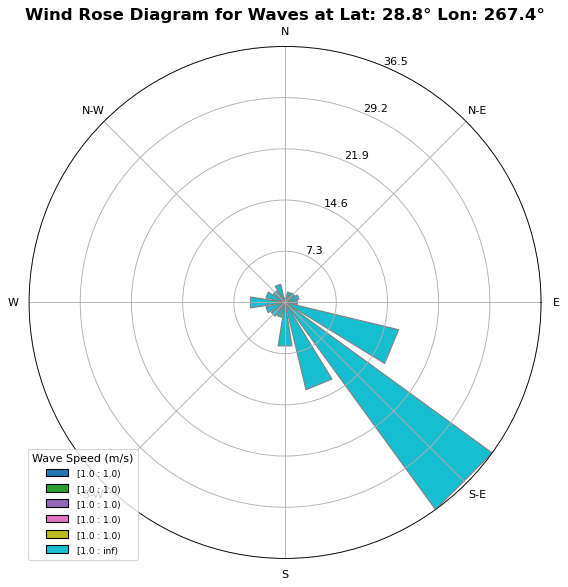

In [27]:
# Make windrose plot for waves
# make all the wave speeds 1 since we only care about direction
wavevelo = np.ones((len(wave_data5.time))) 
ax5 = WindroseAxes.from_ax()
ax5.bar(wave_data5.dirpw.values, wavevelo, normed=True, opening=0.8, edgecolor='gray', cmap=cm.tab10)
ax5.set_legend(title='Wave Speed (m/s)', loc='lower left')
ax5.set_title('Wind Rose Diagram for Waves at Lat: ' + str(lat) + u'\N{DEGREE SIGN}' + ' Lon: ' + str(lon) + u'\N{DEGREE SIGN}',
             fontweight='bold', fontsize=15)

Text(0.5, 1.0, 'Rose Diagram for Wave Power at Lat: 28.8° Lon: 267.4°')

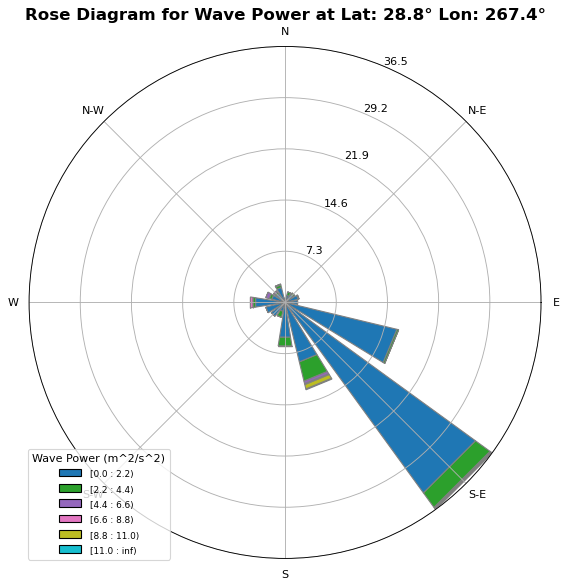

In [28]:
# Make a windrose (rose diagram?) plot for wave power 
ax4 = WindroseAxes.from_ax()
ax4.bar(wave_data5.dirpw.values, wave_power, normed=True, opening=0.8, edgecolor='gray', cmap=cm.tab10)
ax4.set_legend(title='Wave Power (m^2/s^2)', loc='lower left')
ax4.set_title('Rose Diagram for Wave Power at Lat: ' + str(lat) + u'\N{DEGREE SIGN}' + ' Lon: ' + str(lon) + u'\N{DEGREE SIGN}',
             fontweight='bold', fontsize=15)

Text(0, 0.5, 'Latitude (degrees)')

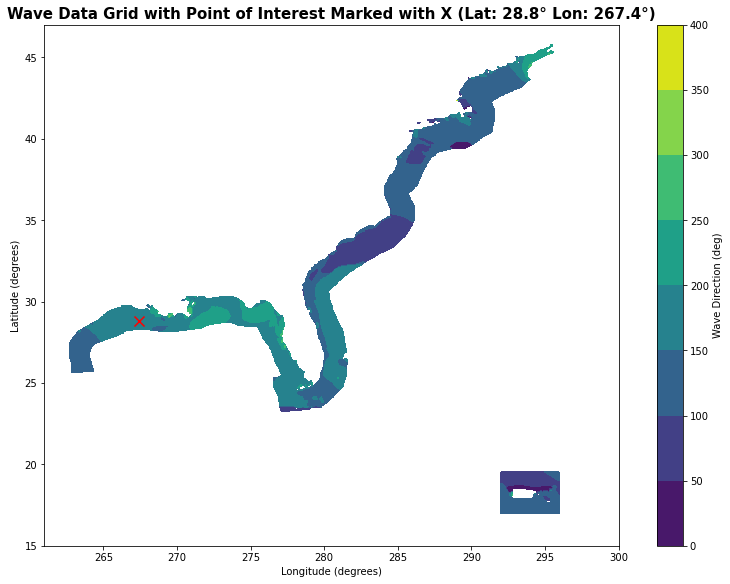

In [29]:
# Plot where this point is in the grid
# Primary wave direction 
fig6, ax6 = plt.subplots(figsize=(10,8), constrained_layout=True)
ax6.set_title('Wave Data Grid with Point of Interest Marked with X'  + ' (Lat: ' + str(lat) + u'\N{DEGREE SIGN}' + ' Lon: ' + str(lon) + u'\N{DEGREE SIGN}' + ')',
             fontweight='bold', fontsize=15)

cs6 = ax6.contourf(ww3.data.longitude[:].values, ww3.data.latitude[:].values, ww3.data.dirpw[5,:,:]) 
ax6.scatter(lon, lat, marker='x', color='r', s=100)
fig6.colorbar(cs6, ax=ax6, label='Wave Direction (deg)')
ax6.set_xlabel('Longitude (degrees)')
ax6.set_ylabel('Latitude (degrees)')